In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [3]:
# Hyper Parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy Dataset 
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [4]:
# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [5]:
# Creat model
model = nn.Linear(input_size,output_size)
#model = LinearRegression(input_size, output_size)
print(model.weight)
print(model.bias)

Parameter containing:
1.00000e-02 *
  7.1322
[torch.FloatTensor of size 1x1]

Parameter containing:
-0.8632
[torch.FloatTensor of size 1]



In [6]:
# Loss and Optimizer
criterion = nn.MSELoss()  # Calculate mean squared error
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  # stochastic gradient descent 

Epoch [1/60], Loss: 7.9565
Epoch [6/60], Loss: 3.5107
Epoch [11/60], Loss: 1.7091
Epoch [16/60], Loss: 0.9788
Epoch [21/60], Loss: 0.6825
Epoch [26/60], Loss: 0.5620
Epoch [31/60], Loss: 0.5127
Epoch [36/60], Loss: 0.4922
Epoch [41/60], Loss: 0.4835
Epoch [46/60], Loss: 0.4795
Epoch [51/60], Loss: 0.4774
Epoch [56/60], Loss: 0.4760


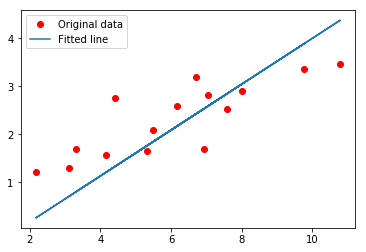

In [7]:
# Convert numpy array to torch Variable
inputs = Variable(torch.from_numpy(x_train))
targets = Variable(torch.from_numpy(y_train))

# Train the Model 
for epoch in range(num_epochs):

    # Forward + Backward + Optimize
    optimizer.zero_grad()   #Clears the gradients of all optimized Variables
    outputs = model(inputs) # Forward
    loss = criterion(outputs, targets) #Forward
    loss.backward()         # Backward , nn.Criterion.backward() only do one thing : updateGradInput
    optimizer.step()        # Optimize
    
    if (epoch) % 5 == 0:
        print ('Epoch [%d/%d], Loss: %.4f' 
               %(epoch+1, num_epochs, loss.data[0]))
        
# Plot the graph
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()  # Place a legend on the axes.
plt.show()

# Save the Model
#torch.save(model.state_dict(), 'model.pkl')

In [8]:
print(model.weight)
print(model.bias)

Parameter containing:
 0.4778
[torch.FloatTensor of size 1x1]

Parameter containing:
-0.7805
[torch.FloatTensor of size 1]

